# <center> EMI Music Data Science Hackathon 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import math

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 1. Таблица train

This csv file contains data that relate to how people rate EMI artists, during the market research interviews, right after hearing a sample of an artist’s song. The 6 columns are: 
- `Artist`. An anonymised identifier for the EMI artist. 
- `Track`. An anonymised identifier for the artist’s track. 
- `User`. An anonymised identifier for the market research respondent, who will have just heard a sample from the track. 
- `Rating`. A number between X-100 which answers the question: How much do you like or dislike the music?  (Train only, you're predicting this for the test set) 
- `Time`. The time the market research was completed: It is the anonymised research date indicating which month the research was conducted in. It can help you understand which other artists/tracks were researched in the same wave. Note it is not in chronological order 

In [45]:
train = pd.read_csv('train.csv')

In [46]:
train.head()

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [47]:
train.shape

(188690, 5)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188690 entries, 0 to 188689
Data columns (total 5 columns):
Artist    188690 non-null int64
Track     188690 non-null int64
User      188690 non-null int64
Rating    188690 non-null int64
Time      188690 non-null int64
dtypes: int64(5)
memory usage: 7.2 MB


In [49]:
train.isnull().any()

Artist    False
Track     False
User      False
Rating    False
Time      False
dtype: bool

In [50]:
train=train.reset_index(drop=True)

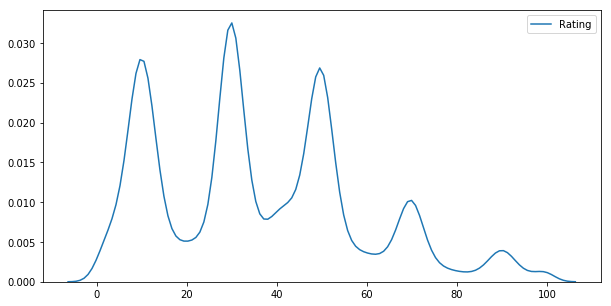

In [23]:
sns.kdeplot(train.Rating); # распределение рейтинга

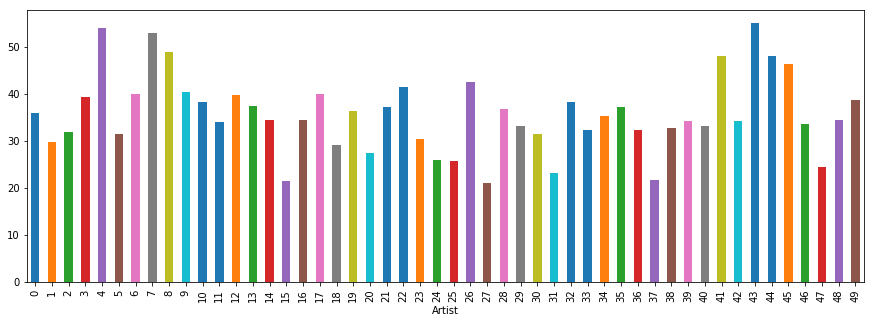

In [25]:
rcParams['figure.figsize'] = 15, 5
train.groupby('Artist')['Rating'].mean().plot(kind='bar'); # средний рейтинг по исполнителям

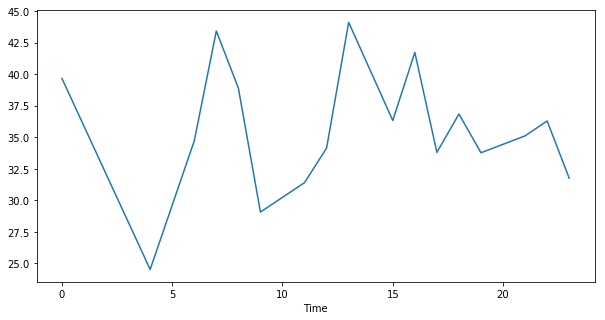

In [27]:
rcParams['figure.figsize'] = 10, 5
train.groupby('Time')['Rating'].mean().plot(); # средний рейтинг в зависимости от времени

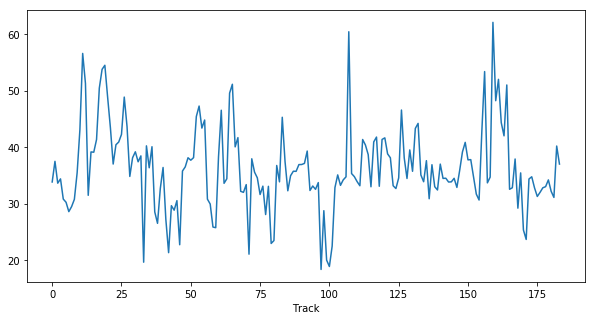

In [28]:
train.groupby('Track')['Rating'].mean().plot(); # средний рейтинг в зависимости от трека

## Простая модель (Random Forest)

In [51]:
def rmse(x, y): return math.sqrt(((x-y)**2).mean())

In [52]:
X = train.drop('Rating', 1)
y= train.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
rmse(y_test, y_predict)

21.64736011490077

In [53]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
1,Track,0.537
0,Artist,0.364
3,Time,0.066
2,User,0.033


## 2. Таблица user

csv file gives data about the respondents themselves, including their attitude towards music. The columns include: 
- `User`. The anonymised user identifier 
- `Gender`. Male/female 
- `Age`. The respondent’s age, in years. 
- `Working status`. Whether they are working full-time/retired/etc. 
- `Region`. The region of the United Kingdom where they live. 
- `MUSIC`. The respondent’s view on the importance of music in his/her life. 
- `LIST_OWN`. An estimate for the number of daily hours spent listening to music they own or have chosen. 
- `LIST_BACK`. An estimate for the number of daily hours the respondent spends listening to background music/music they have not chosen. 
- `Music habit questions`. Each of these asks the respondent to rate, on a scale of X-100, whether they agree with the following: 
    - a. I enjoy actively searching for and discovering music that I have never heard before 
    - b. I find it easy to find new music 
    - c. I am constantly interested in and looking for more music 
    - d. I would like to buy new music but I don’t know what to buy 
    - e. I used to know where to find music 
    - f. I am not willing to pay for music 
    - g. I enjoy music primarily from going out to dance 
    - h. Music for me is all about nightlife and going out 
    - i. I am out of touch with new music 
    - j. My music collection is a source of pride 
    - k. Pop music is fun 
    - l. Pop music helps me to escape 
    - m. I want a multi media experience at my fingertips wherever I go 
    - n. I love technology 
    - o. People often ask my advice on music - what to listen to 
    - p. I would be willing to pay for the opportunity to buy new music pre-release 
    - q. I find seeing a new artist / band on TV a useful way of discovering new music 
    - r. I like to be at the cutting edge of new music 
    - s. I like to know about music before other people 

In [2]:
users = pd.read_csv('users.csv')

In [35]:
users.head()

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0


In [36]:
users.shape

(48645, 27)

In [37]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48645 entries, 0 to 48644
Data columns (total 27 columns):
RESPID       48645 non-null int64
GENDER       48645 non-null object
AGE          48178 non-null float64
WORKING      35520 non-null object
REGION       47605 non-null object
MUSIC        48645 non-null object
LIST_OWN     42706 non-null object
LIST_BACK    42820 non-null object
Q1           48645 non-null float64
Q2           48645 non-null float64
Q3           48645 non-null float64
Q4           48645 non-null float64
Q5           48645 non-null float64
Q6           48645 non-null float64
Q7           48645 non-null float64
Q8           48645 non-null float64
Q9           48645 non-null float64
Q10          48645 non-null float64
Q11          48645 non-null float64
Q12          48645 non-null float64
Q13          48645 non-null float64
Q14          48645 non-null float64
Q15          48645 non-null float64
Q16          42210 non-null float64
Q17          48645 non-null float64

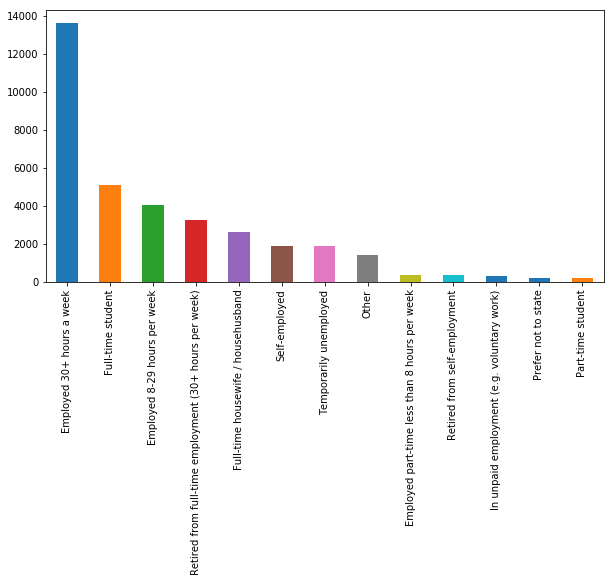

In [38]:
users['WORKING'].value_counts().plot(kind='bar'); # кол-во людей на каждый статус занятости

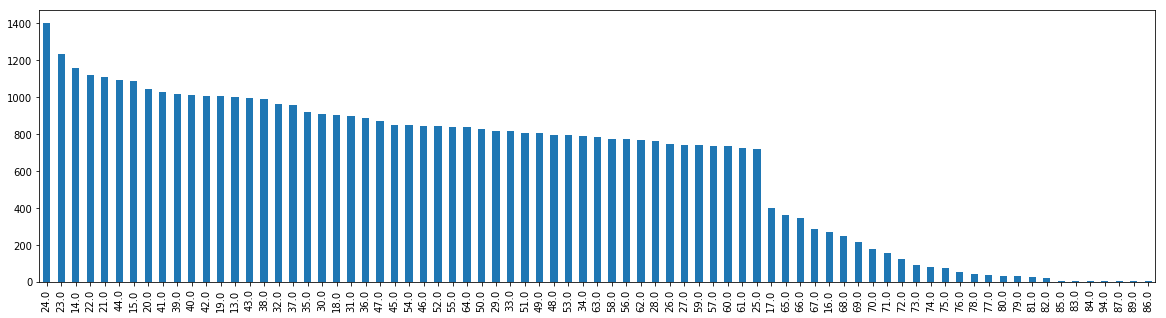

In [12]:
rcParams['figure.figsize'] = 20, 5
users['AGE'].value_counts().plot(kind='bar'); # кол-во респондентов в зависимости от возраста

**Добавляем в таблицу train признак Gender**

In [54]:
train['Gender'] = train.User.map(users.set_index('RESPID')['GENDER'].to_dict())

In [55]:
train.head()

,Artist,Track,User,Rating,Time,Gender
0,40,179,47994,9,17,Female
1,9,23,8575,58,7,Female
2,46,168,45475,13,16,Male
3,11,153,39508,42,15,Female
4,14,32,11565,54,19,Female


In [56]:
train = pd.get_dummies(train)
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male
0,40,179,47994,9,17,1,0
1,9,23,8575,58,7,1,0
2,46,168,45475,13,16,0,1
3,11,153,39508,42,15,1,0
4,14,32,11565,54,19,1,0


In [57]:
X = train.drop('Rating', 1)
y= train.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
rmse(y_test, y_predict) # было 21.6473

21.64169865780934

In [58]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
1,Track,0.527
0,Artist,0.376
3,Time,0.059
2,User,0.030
4,Gender_Female,0.004
5,Gender_Male,0.004


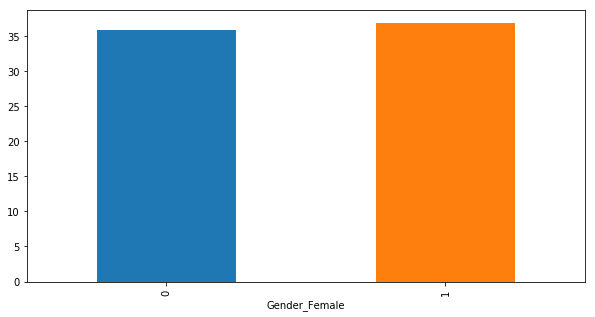

In [61]:
rcParams['figure.figsize'] = 10, 5
train.groupby('Gender_Female')['Rating'].mean().plot(kind='bar');

***Вывод: рейтинг не сильно зависит от пола респондентов***

**Добавляем возраст и регион**

In [62]:
train['Age'] = train.User.map(users.set_index('RESPID')['AGE'].to_dict())
train['Region'] = train.User.map(users.set_index('RESPID')['REGION'].to_dict())

In [63]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region
0,40,179,47994,9,17,1,0,41.0,North
1,9,23,8575,58,7,1,0,45.0,Centre
2,46,168,45475,13,16,0,1,23.0,Midlands
3,11,153,39508,42,15,1,0,61.0,Midlands
4,14,32,11565,54,19,1,0,20.0,South


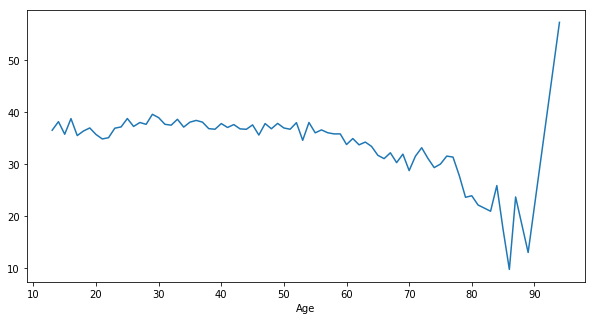

In [64]:
train.groupby('Age')['Rating'].mean().plot(); # распределение рейтинга в зависимотси от возраста

In [65]:
train['Region'].value_counts()

North               58707
South               54005
Midlands            44220
Centre               7284
Northern Ireland     2890
North Ireland         375
Name: Region, dtype: int64

In [66]:
train.isnull().sum()

Artist               0
Track                0
User                 0
Rating               0
Time                 0
Gender_Female        0
Gender_Male          0
Age              13708
Region           21209
dtype: int64

In [67]:
dct = {'North': 1, 'South': 2, 'Midlands': 3, 'Centre': 4, 'Northern Ireland': 5, 'North Ireland': 6}
train['Region'] = train['Region'].map(dct)
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region
0,40,179,47994,9,17,1,0,41.0,1.0
1,9,23,8575,58,7,1,0,45.0,4.0
2,46,168,45475,13,16,0,1,23.0,3.0
3,11,153,39508,42,15,1,0,61.0,3.0
4,14,32,11565,54,19,1,0,20.0,2.0


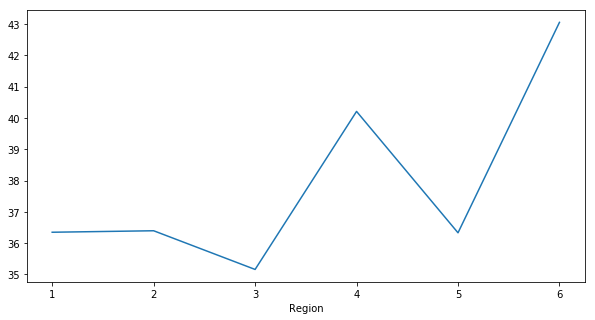

In [68]:
train.groupby('Region')['Rating'].mean().plot(); # распределение рейтинга в зависимотси от региона

In [69]:
train = train.fillna(train.mean())

In [70]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region
0,40,179,47994,9,17,1,0,41.0,1.0
1,9,23,8575,58,7,1,0,45.0,4.0
2,46,168,45475,13,16,0,1,23.0,3.0
3,11,153,39508,42,15,1,0,61.0,3.0
4,14,32,11565,54,19,1,0,20.0,2.0


In [71]:
train.isnull().sum()

Artist           0
Track            0
User             0
Rating           0
Time             0
Gender_Female    0
Gender_Male      0
Age              0
Region           0
dtype: int64

In [72]:
X = train.drop('Rating', 1)
y= train.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
rmse(y_test, y_predict) # было 21.6416

21.592212944035538

In [73]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
1,Track,0.457
0,Artist,0.292
6,Age,0.130
3,Time,0.075
2,User,0.038
4,Gender_Female,0.004
5,Gender_Male,0.004
7,Region,0.000


*Проверка скора*

In [74]:
forest.score(X_train, y_train)

0.08905161610010702

In [75]:
forest.score(X_test, y_test)

0.08814658397343444

**Добавляем характеристики важности музыки для респондентов, наиболее очевидные эпитеты:**
- I am constantly interested in and looking for more music (c)
- Pop music is fun (k)
- I like to be at the cutting edge of new music (r)

In [76]:
train['Music'] = train.User.map(users.set_index('RESPID')['MUSIC'].to_dict())
train['c'] = train.User.map(users.set_index('RESPID')['Q3'].to_dict())
train['k'] = train.User.map(users.set_index('RESPID')['Q11'].to_dict())
train['r'] = train.User.map(users.set_index('RESPID')['Q18'].to_dict())

In [77]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,c,k,r
0,40,179,47994,9,17,1,0,41.0,1.0,Music means a lot to me and is a passion of mine,62.0,49.0,10.0
1,9,23,8575,58,7,1,0,45.0,4.0,Music is important to me but not necessarily m...,52.0,91.0,NaN
2,46,168,45475,13,16,0,1,23.0,3.0,Music means a lot to me and is a passion of mine,90.0,72.0,73.0
3,11,153,39508,42,15,1,0,61.0,3.0,Music is important to me but not necessarily m...,55.0,71.0,50.0
4,14,32,11565,54,19,1,0,20.0,2.0,Music is important to me but not necessarily m...,28.0,84.0,37.0


In [78]:
train.Music.value_counts()

Music is important to me but not necessarily more important                                    56695
Music means a lot to me and is a passion of mine                                               54793
I like music but it does not feature heavily in my life                                        43023
Music is important to me but not necessarily more important than other hobbies or interests    12977
Music is no longer as important as it used to be to me                                          5702
Music has no particular interest for me                                                         3643
Name: Music, dtype: int64

In [79]:
train.isnull().any()

Artist           False
Track            False
User             False
Rating           False
Time             False
Gender_Female    False
Gender_Male      False
Age              False
Region           False
Music             True
c                 True
k                 True
r                 True
dtype: bool

In [80]:
train = train.fillna(0)
train.loc[(train.Music == 0), "Music"] = "NotMent"

In [153]:
def encode_features(dataset, array):
    for el in array:
        le = LabelEncoder()
        le.fit(dataset[el])
        dataset[el] = le.transform(dataset[el])

In [84]:
encode_features(train, ["Music"])

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,c,k,r
0,40,179,47994,9,17,1,0,41.000000,1.000000,5,62.0,49.0,10.0
1,9,23,8575,58,7,1,0,45.000000,4.000000,2,52.0,91.0,0.0
2,46,168,45475,13,16,0,1,23.000000,3.000000,5,90.0,72.0,73.0
3,11,153,39508,42,15,1,0,61.000000,3.000000,2,55.0,71.0,50.0
4,14,32,11565,54,19,1,0,20.000000,2.000000,2,28.0,84.0,37.0
5,31,79,27130,37,11,1,0,35.000000,2.000000,2,24.0,21.0,52.0
6,21,48,19623,69,21,1,0,58.000000,3.000000,0,22.0,74.0,30.0
7,2,174,47505,28,17,0,1,13.000000,3.000000,5,49.0,53.0,52.0
8,12,34,15290,12,8,0,1,40.000000,3.000000,5,86.0,65.0,0.0
9,28,73,24151,70,22,1,0,54.000000,2.000000,3,8.0,67.0,8.0


In [85]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,c,k,r
0,40,179,47994,9,17,1,0,41.0,1.0,5,62.0,49.0,10.0
1,9,23,8575,58,7,1,0,45.0,4.0,2,52.0,91.0,0.0
2,46,168,45475,13,16,0,1,23.0,3.0,5,90.0,72.0,73.0
3,11,153,39508,42,15,1,0,61.0,3.0,2,55.0,71.0,50.0
4,14,32,11565,54,19,1,0,20.0,2.0,2,28.0,84.0,37.0


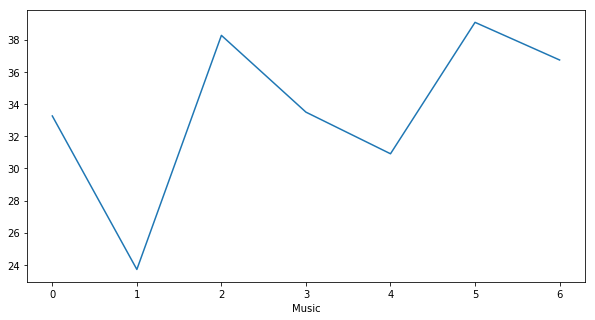

In [86]:
train.groupby('Music')['Rating'].mean().plot();# распределение рейтиега в зависимости от оценки важности музыки для респондентов

In [87]:
X = train.drop('Rating', 1)
y= train.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
rmse(y_test, y_predict) # было 21.5922

21.446610869704546

In [88]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
10,k,0.281
1,Track,0.270
0,Artist,0.191
2,User,0.096
9,c,0.077
3,Time,0.045
11,r,0.031
6,Age,0.007
8,Music,0.001
4,Gender_Female,0.000


**Добавляем оставшиеся эпитеты**

In [89]:
train['a'] = train.User.map(users.set_index('RESPID')['Q1'].to_dict())
train['b'] = train.User.map(users.set_index('RESPID')['Q2'].to_dict())
train['d'] = train.User.map(users.set_index('RESPID')['Q4'].to_dict())
train['e'] = train.User.map(users.set_index('RESPID')['Q5'].to_dict())
train['f'] = train.User.map(users.set_index('RESPID')['Q6'].to_dict())
train['g'] = train.User.map(users.set_index('RESPID')['Q7'].to_dict())
train['h'] = train.User.map(users.set_index('RESPID')['Q8'].to_dict())
train['i'] = train.User.map(users.set_index('RESPID')['Q9'].to_dict())
train['j'] = train.User.map(users.set_index('RESPID')['Q10'].to_dict())
train['l'] = train.User.map(users.set_index('RESPID')['Q12'].to_dict())
train['m'] = train.User.map(users.set_index('RESPID')['Q13'].to_dict())
train['n'] = train.User.map(users.set_index('RESPID')['Q14'].to_dict())
train['o'] = train.User.map(users.set_index('RESPID')['Q15'].to_dict())
train['p'] = train.User.map(users.set_index('RESPID')['Q16'].to_dict())
train['q'] = train.User.map(users.set_index('RESPID')['Q17'].to_dict())
train['s'] = train.User.map(users.set_index('RESPID')['Q19'].to_dict())

In [90]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,...,h,i,j,l,m,n,o,p,q,s
0,40,179,47994,9,17,1,0,41.0,1.0,5,...,28.0,88.0,70.0,49.0,32.0,32.0,50.0,31.0,31.0,9.0
1,9,23,8575,58,7,1,0,45.0,4.0,2,...,51.0,12.0,50.0,72.0,32.0,55.0,53.0,54.0,75.0,NaN
2,46,168,45475,13,16,0,1,23.0,3.0,5,...,29.0,29.0,71.0,48.0,100.0,100.0,28.0,65.0,72.0,83.0
3,11,153,39508,42,15,1,0,61.0,3.0,2,...,27.0,41.0,52.0,73.0,53.0,61.0,49.0,52.0,63.0,45.0
4,14,32,11565,54,19,1,0,20.0,2.0,2,...,10.0,11.0,55.0,70.0,20.0,19.0,11.0,47.0,71.0,26.0


In [91]:
train.isnull().any()

Artist           False
Track            False
User             False
Rating           False
Time             False
Gender_Female    False
Gender_Male      False
Age              False
Region           False
Music            False
c                False
k                False
r                False
a                 True
b                 True
d                 True
e                 True
f                 True
g                 True
h                 True
i                 True
j                 True
l                 True
m                 True
n                 True
o                 True
p                 True
q                 True
s                 True
dtype: bool

In [92]:
train = train.fillna(0)

In [110]:
X = train.drop('Rating', 1)
y = train.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
rmse(y_test, y_predict) # было 21.4466

21.461057238686823

In [111]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
26,q,0.247
1,Track,0.215
10,k,0.161
0,Artist,0.102
2,User,0.098
25,p,0.065
3,Time,0.029
21,l,0.018
12,a,0.012
19,i,0.009


**Смотрим на изменение результатов метрики после удаления каждого из признаков, чья важность лежит в диапазоне `[0 ; 0.1)`
Это признаки:**
 - Gender
 - Region
 - Age
 - i. I am out of touch with new music 
 - d. I would like to buy new music but I don’t know what to buy 
 - g. I enjoy music primarily from going out to dance 
 - e. I used to know where to find music 
 - f. I am not willing to pay for music 
 - j. My music collection is a source of pride 
 - n. I love technology 
 - s. I like to know about music before other people 
 - m. I want a multi media experience at my fingertips wherever I go 
 - h. Music for me is all about nightlife and going out 
 - c. I am constantly interested in and looking for more music 
 - b. I find it easy to find new music 
 - o. People often ask my advice on music - what to listen to

In [108]:
feats = ['i', 'd', 'g', 'e', 'f', 'j', 'Age', 'n', 's', 'm', 'h', 'c', 'b', 'Music', 'Region', 'o', 'Gender_Male', 'Gender_Female']

In [112]:
for f in feats:
    df_subs = train.drop(f, axis=1)
    X = df_subs.drop('Rating', 1)
    y = df_subs.Rating
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
    forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    forest.fit(X_train, y_train)
    y_predict = forest.predict(X_test)
    accur = rmse(y_test, y_predict)
    print(f, '', accur)

i  21.46817942058946
d  21.456274116366824
g  21.46330753640308
e  21.46858099602523
f  21.453044310698306
j  21.47314504922061
Age  21.452745609944348
n  21.466079296221217
s  21.469670739008336
m  21.426746527386968
h  21.45967935509722
c  21.46552809245457
b  21.441969322968504
Music  21.460691727299487
Region  21.46514578455334
o  21.456972947242274
Gender_Male  21.468553912950973
Gender_Female  21.475161335288657


In [134]:
df_subs = train.drop(['f', 'o', 'd', 'e', 'j', 'm'], 1)
X = df_subs.drop('Rating', 1)
y = df_subs.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur) # было 21.4610

21.434524057508348


In [135]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
20,q,0.214
1,Track,0.180
10,k,0.167
0,Artist,0.119
2,User,0.075
19,p,0.065
17,l,0.047
3,Time,0.038
12,a,0.023
11,r,0.018


In [137]:
df_subs2 = df_subs.drop(['Region', 'Gender_Male', 'Gender_Female'], 1)
X = df_subs2.drop('Rating', 1)
y = df_subs2.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur) # было 21.4345

21.454975950670864


In [138]:
train = df_subs

## 3. Таблица words

This csv file contains data that shows how people describe the EMI artists whose music they have just heard. 
- `Artist`. An anonymised identifier for the EMI artist. 
- `User`. An anonymised identifier for the market research respondent, who will have just heard one or more samples from the artist. 
- `HEARD_OF`. An entry which answers the question: Have you heard of and/or heard music by this artist? 
- `OWN_ARTIST_MUSIC`, which answers the question: Do you have this artist in your music collection? 
- `LIKE_ARTIST`. A numerical entry which answers the question: To what extent do you like or dislike listening this artist? 
- `Finally, a list of words. There are 82 different words, ranging from “Soulful” to “Cheesy” and “Aggressive.”` After listening to tracks from a particular artist, each respondent will have selected the words they think best describe the artist from a given set. The values in each column are therefore 1, if the respondent thinks that word describes the artist, 0 if the respondent does not think the word describes the artist, and empty if the word was not part of the current interview set. 

In [139]:
words = pd.read_csv('words.csv', encoding='ISO-8859-1')
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN


In [140]:
words.shape

(118301, 88)

In [141]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118301 entries, 0 to 118300
Data columns (total 88 columns):
Artist              118301 non-null int64
User                118301 non-null int64
HEARD_OF            118277 non-null object
OWN_ARTIST_MUSIC    33507 non-null object
LIKE_ARTIST         33308 non-null float64
Uninspired          26154 non-null float64
Sophisticated       20724 non-null float64
Aggressive          97577 non-null float64
Edgy                118301 non-null int64
Sociable            20724 non-null float64
Laid back           20724 non-null float64
Wholesome           1040 non-null float64
Uplifting           20724 non-null float64
Intriguing          20724 non-null float64
Legendary           1040 non-null float64
Free                20724 non-null float64
Thoughtful          118301 non-null int64
Outspoken           20724 non-null float64
Serious             97577 non-null float64
Good lyrics         97577 non-null float64
Unattractive        97577 non-null f

In [142]:
words['HEARD_OF'].value_counts()

Never heard of                             61892
Heard of                                   22878
Heard of and listened to music EVER        19914
Heard of and listened to music RECENTLY    12577
Ever heard music by                          579
Listened to recently                         238
Ever heard of                                199
Name: HEARD_OF, dtype: int64

In [143]:
words['OWN_ARTIST_MUSIC'].value_counts()

Own none of their music           15426
Own a little of their music       11428
Own a lot of their music           4298
Own all or most of their music     1535
DonÕt know                          704
DonÍt know                           71
don`t know                           45
Name: OWN_ARTIST_MUSIC, dtype: int64

In [144]:
words=words.reset_index(drop=True)

In [145]:
words.LIKE_ARTIST.value_counts()

49.00    1639
51.00    1548
50.00    1410
30.00    1360
48.00    1208
29.00    1204
52.00    1005
31.00     951
70.00     878
28.00     825
71.00     819
32.00     743
69.00     700
68.00     666
72.00     590
46.00     573
47.00     569
53.00     565
33.00     541
54.00     531
27.00     434
67.00     429
45.00     412
55.00     370
26.00     358
74.00     328
73.00     327
9.00      322
34.00     311
10.00     293
         ... 
78.68       1
20.90       1
16.63       1
75.91       1
33.05       1
32.41       1
4.26        1
29.21       1
13.01       1
49.04       1
61.19       1
18.12       1
70.15       1
55.44       1
69.72       1
21.32       1
29.64       1
47.76       1
98.08       1
74.17       1
38.59       1
39.45       1
23.24       1
30.92       1
39.02       1
55.01       1
46.91       1
47.55       1
27.72       1
50.32       1
Name: LIKE_ARTIST, Length: 176, dtype: int64

**Делаем слияние train и words**

In [146]:
train_merged = pd.merge(train, words, left_on=['Artist', 'User'], right_on=['Artist', 'User'], how='left')

In [147]:
train_merged.isnull().any()

Artist              False
Track               False
User                False
Rating              False
Time                False
Gender_Female       False
Gender_Male         False
Age                 False
Region              False
Music               False
c                   False
k                   False
r                   False
a                   False
b                   False
g                   False
h                   False
i                   False
l                   False
n                   False
p                   False
q                   False
s                   False
HEARD_OF             True
OWN_ARTIST_MUSIC     True
LIKE_ARTIST          True
Uninspired           True
Sophisticated        True
Aggressive           True
Edgy                 True
                    ...  
Genius               True
Trendsetter          True
Noisy                True
Upbeat               True
Relatable            True
Energetic            True
Exciting             True
Emotional   

In [148]:
train = train_merged.fillna(0)
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,40,179,47994,9,17,1,0,41.0,1.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,23,8575,58,7,1,0,45.0,4.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,46,168,45475,13,16,0,1,23.0,3.0,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11,153,39508,42,15,1,0,61.0,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,32,11565,54,19,1,0,20.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
train.loc[(train.HEARD_OF == 0), "HEARD_OF"] = "NotMent"
train.loc[(train.OWN_ARTIST_MUSIC == 0), "OWN_ARTIST_MUSIC"] = "NotMent"

In [154]:
cols = ["HEARD_OF", "OWN_ARTIST_MUSIC"]
encode_features(train, cols)

In [155]:
train.isnull().any()

Artist              False
Track               False
User                False
Rating              False
Time                False
Gender_Female       False
Gender_Male         False
Age                 False
Region              False
Music               False
c                   False
k                   False
r                   False
a                   False
b                   False
g                   False
h                   False
i                   False
l                   False
n                   False
p                   False
q                   False
s                   False
HEARD_OF            False
OWN_ARTIST_MUSIC    False
LIKE_ARTIST         False
Uninspired          False
Sophisticated       False
Aggressive          False
Edgy                False
                    ...  
Genius              False
Trendsetter         False
Noisy               False
Upbeat              False
Relatable           False
Energetic           False
Exciting            False
Emotional   

In [164]:
X = train.drop('Rating', 1)
y = train.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur) # было 21.4549

17.452449541708983


In [165]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
24,LIKE_ARTIST,0.240
74,Talented,0.226
55,Beautiful,0.182
61,Catchy,0.126
44,Boring,0.091
39,Good lyrics,0.041
76,Distinctive,0.041
60,Cool,0.018
71,Timeless,0.012
23,OWN_ARTIST_MUSIC,0.003


In [160]:
'''
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=train.columns, orientation='left', leaf_font_size=16)
plt.show()
'''#здесь должна быть дендограмма (distance matrix X must be symmetric)

"\nimport scipy\nfrom scipy.cluster import hierarchy as hc\ncorr = np.round(scipy.stats.spearmanr(train).correlation, 4)\ncorr_condensed = hc.distance.squareform(1-corr)\nz = hc.linkage(corr_condensed, method='average')\nfig = plt.figure(figsize=(16,10))\ndendrogram = hc.dendrogram(z, labels=train.columns, orientation='left', leaf_font_size=16)\nplt.show()\n"

In [168]:
importances = importances.sort_values("importance", ascending=False).head(20)
feat = importances.feature.values
train_new = train.copy()
feat_train = train_new.columns.values
for f in feat_train:
    if f not in feat and f != 'Rating':
        train_new = train_new.drop(f, axis=1) # скормим модели датасет без признаков с важностью 0 

In [172]:
train_new.head()

,Track,User,Rating,Time,p,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Good lyrics,Unattractive,...,Inspiring,Beautiful,Fun,Cool,Catchy,Timeless,Original,Talented,Distinctive,None of these
0,179,47994,9,17,31.0,6,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,8575,58,7,54.0,6,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,168,45475,13,16,65.0,6,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,153,39508,42,15,52.0,3,6,28.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,32,11565,54,19,47.0,3,6,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [169]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188690 entries, 0 to 188689
Data columns (total 21 columns):
Track               188690 non-null int64
User                188690 non-null int64
Rating              188690 non-null int64
Time                188690 non-null int64
p                   188690 non-null float64
HEARD_OF            188690 non-null int64
OWN_ARTIST_MUSIC    188690 non-null int64
LIKE_ARTIST         188690 non-null float64
Good lyrics         188690 non-null float64
Unattractive        188690 non-null float64
Boring              188690 non-null float64
Inspiring           188690 non-null float64
Beautiful           188690 non-null float64
Fun                 188690 non-null float64
Cool                188690 non-null float64
Catchy              188690 non-null float64
Timeless            188690 non-null float64
Original            188690 non-null float64
Talented            188690 non-null float64
Distinctive         188690 non-null float64
None of these       1

## Итоговая модель (после регулировки глубины деревьев)##

In [171]:
X = train_new.drop('Rating', 1)
y = train_new.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur) # было 17.4524

15.611587849151016


In [191]:
train_new.to_csv('train_new.csv')

## Линейная регрессия ##

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
lg = LinearRegression().fit(X_train, y_train)
y_predict = lg.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

16.90943928427406


## XGBoost

In [175]:
from xgboost import XGBRegressor

In [176]:
xgb = XGBRegressor().fit(X_train, y_train)
y_predict = xgb.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

16.30360000266429


## Дерево решений ##

In [177]:
from sklearn.tree import DecisionTreeRegressor

In [190]:
regressor = DecisionTreeRegressor(random_state=0, max_depth = 10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

17.097713296244606
